In [1]:
import astropy.io.fits as fits
import astropy.constants as const
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes,InsetPosition,mark_inset)
import scipy.interpolate as interp
from matplotlib import cm
import matplotlib
from scipy.constants import h, c, k


In [2]:
def read_opacity(f):
    block = fits.getdata(f)
    T = block[:,0][1:]
    wl = block[0][1:]
    K = block[1:,1:]
    return(wl,K,T)
#Element 0,0 is a dummy value equal to zero.
wl,K_H2O,T_axis = read_opacity('H2O_opacity.fits')
wl,K_CO2,T_axis = read_opacity('CO2_opacity.fits')
wl=wl/1000
 # transform nm to micro-m

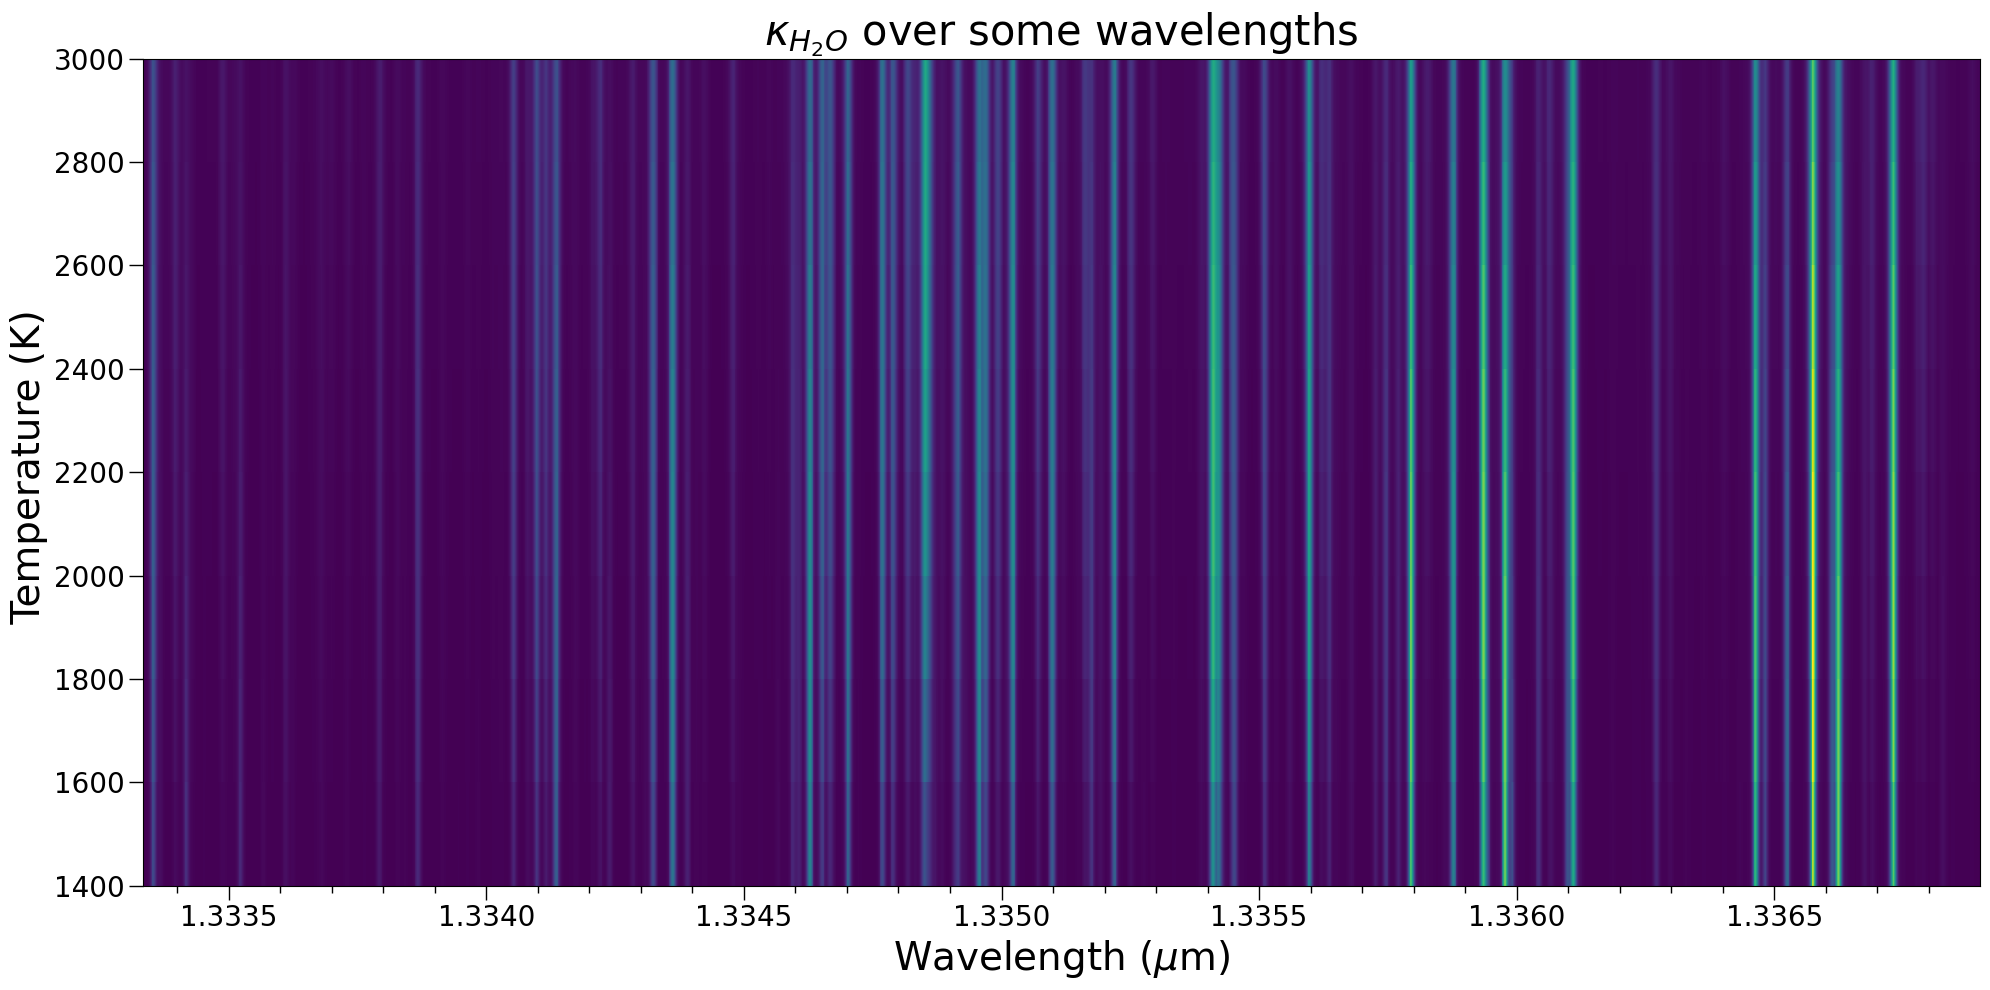

In [3]:
plt.figure(figsize=(20,10))
plt.pcolormesh(wl[-502000:-500000],T_axis,K_H2O[:,-502000:-500000],shading='nearest' ,cmap= 'viridis' )
#plt.pcolormesh(wl[-600000:-400000],T_axis,K_H2O[:,-600000:-400000],shading= nearest ,cmap= viridis )
#plt.pcolormesh(wl,T_axis,K_H2O,shading= nearest ,cmap= viridis )
plt.xlabel( 'Wavelength ($\mu$m)' ,fontsize=28)
plt.ylabel(' Temperature (K)' ,fontsize=28)
plt.title( '$\kappa_{H_2O}$ over some wavelengths ',fontsize=30)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
for axx in [ax]:
    axx.xaxis.set_tick_params(labelsize=20)
    axx.yaxis.set_tick_params(labelsize=20)
    axx.xaxis.set_minor_locator(AutoMinorLocator(5))
    axx.tick_params( 'both' , length=10, width=1, which= 'major' )
    axx.tick_params( 'both' , length=5, width=1, which= 'minor' )
    plt.tight_layout()
    plt.savefig( 'opacities2D.png')

In [4]:
T = np.linspace(100, 3000, 100) * u.K
K_H2O_i = interp.interp1d(
    T_axis, 
    K_H2O.T, 
    bounds_error=False, 
    fill_value=(K_H2O[0], K_H2O[-1])
)(T.value).T  # Use T.value for unitless input


In [5]:
 K_CO2_i = interp.interp1d(T_axis,K_CO2.T,bounds_error=False,fill_value=(
 K_CO2[0],K_CO2[-1]))(T.value).T

In [6]:
# 1. Define molecular weights (g/mol)
m_H2O = 18.0
m_CO2 = 44.0

# 2. Define mixing ratios (unitless fractions)
chi_H2O = 0.01    # 1% water
chi_CO2 = 0.0004   # 400 ppm CO2

# 3. Define continuum opacity (cm²/g)
kappa_c = 0.0
K = (m_H2O * chi_H2O * K_H2O_i + m_CO2 * chi_CO2 * K_CO2_i + kappa_c) * u.cm*u.cm / u.g

ValueError: x and y must have same first dimension, but have shapes (1068181,) and (100, 1068181)

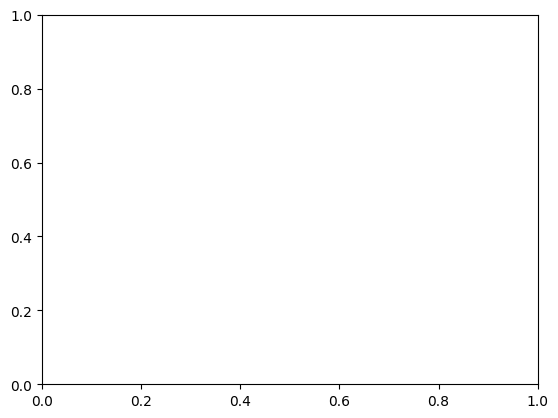

In [7]:
plt.plot(wl, K)

In [ ]:
# --- Physical constants ---
R_earth = 6.371e6      # meters
R_sun = 6.957e8        # meters
AU = 1.496e11          # meters

# --- System parameters from Table 4.2 ---
# System 1
T_surf_1 = 1500.0      # K
R_p_1 = 1.0 * R_earth  # meters
T_star_1 = 5000.0      # K
R_star_1 = 1.0 * R_sun # meters

# System 2
T_surf_2 = 2000.0      # K
R_p_2 = 1.0 * R_earth  # meters
T_star_2 = 5000.0      # K
R_star_2 = 1.0 * R_sun # meters

# --- Wavelength grid (in meters) ---
wavelength_um = np.linspace(0.5, 50, 500)   # microns
wavelength_m = wavelength_um * 1e-6         # meters

# --- Planck function ---
def planck(wavelength, T):
    """Spectral radiance B_lambda in W/m^2/m/sr"""
    return (2*h*c**2) / (wavelength**5) / (np.exp(h*c/(wavelength*k*T)) - 1)

# --- Calculate fluxes (integrated over solid angle) ---
def flux_bb(wavelength, T):
    """Blackbody flux F_lambda in W/m^2/m"""
    return np.pi * planck(wavelength, T)

# --- Calculate planet/star contrast ---
def contrast(Tp, Rp, Ts, Rs):
    Fp = flux_bb(wavelength_m, Tp)
    Fs = flux_bb(wavelength_m, Ts)
    return (Fp / Fs) * (Rp/Rs)**2

# --- Compute contrasts ---
contrast1 = contrast(T_surf_1, R_p_1, T_star_1, R_star_1)
contrast2 = contrast(T_surf_2, R_p_2, T_star_2, R_star_2)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(wavelength_um, contrast1*1e6, label='System 1: $T_{surf}=1500$ K')
plt.plot(wavelength_um, contrast2*1e6, label='System 2: $T_{surf}=2000$ K')
plt.xlabel('Wavelength (μm)', fontsize=14)
plt.ylabel('Planet/Star Contrast (ppm)', fontsize=14)
plt.title('Thermal Emission Contrast (Barerock, No Atmosphere)', fontsize=15)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:









T_surf_1 = 1500  # K
T_surf_2 = 2000  # K
T_atmos_1 = 2000  # K
T_atmos_2 = 1500  # K
R_p = 1.0*R_earth  # earth rad
R_star = 1.0*R_sun  # solar rad
T_star = 5000  # K
a_1 = 0.01992*AU
a_2 = 0.019*AU

lam_val = np.linspace(0, 1, 1000)
lam_meter = 1e-6 * lam_val  # convert to meters

P = 1e5 * u.Pa  # Pressure
g = 9.8 * u.m / u.s**2  # gravity




# Call the function
result = second_eclipse_depth(lam_val, R_p, R_star, optical_depth, T_star, T_surf_1, T_atmos_1, a_1, 0)

plt.plot(lam_val, second_eclipse_depth(lam_meter, R_p, R_star, optical_depth, T_star, T_surf_1, T_atmos_1, a_1, 0) )

In [ ]:
0.3-0.043

In [13]:
# --- Planck function ---
a = 0.01992 * AU   
def planck(wavelength, T):
    """Spectral radiance B_lambda in W/m^2/m/sr"""
    return (2*h*c**2) / (wavelength**5) / (np.exp(h*c/(wavelength*k*T)) - 1)

def flux_bb(wavelength, T):
    """Blackbody flux F_lambda in W/m^2/m"""
    return np.pi * planck(wavelength, T)

# --- Contrast function including reflected light ---
def contrast(Tp, Rp, Ts, Rs, a, Ag):
    Fp = flux_bb(wavelength_m, Tp)
    Fs = flux_bb(wavelength_m, Ts)
    # Thermal emission
    thermal = (Fp / Fs) * (Rp/Rs)**2
    # Reflected light
    reflected = (Rp/a)**2 * Ag
    return thermal + reflected

# --- Geometric albedos to plot ---
albedos = [0.0, 0.3, 0.7, 1.0]
colors = ['k', 'b', 'g', 'r']

plt.figure(figsize=(8,5))

for Ag, color in zip(albedos, colors):
    contrast_vals = contrast(T_surf_1, R_p_1, T_star_1, R_star_1, a, Ag)
    plt.plot(wavelength_um, contrast_vals*1e6, color=color, label=f'$A_g$={Ag}')

plt.xlabel('Wavelength (μm)', fontsize=14)
plt.ylabel('Planet/Star Contrast (ppm)', fontsize=14)
plt.title('Barerock System 1: Thermal + Reflected Contrast', fontsize=15)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'AU' is not defined

In [ ]:
# --- Physical constants ---
R_earth = 6.371e6      # meters
R_sun = 6.957e8        # meters

# --- Parameters for scenarios 1 and 2 (from Table 4.2) ---
scenarios = {
    'Scenario 1': {'T_surf': 1500.0, 'R_p': 1.0 * R_earth, 'T_star': 5000.0, 'R_star': 1.0 * R_sun},
    'Scenario 2': {'T_surf': 2000.0, 'R_p': 1.0 * R_earth, 'T_star': 5000.0, 'R_star': 1.0 * R_sun}
}

# --- Wavelength grid ---
wavelength_um = np.linspace(0.5, 20, 1000)   # microns
wavelength_m = wavelength_um * 1e-6          # meters

# --- Planck function ---
def planck(wavelength, T):
    """Spectral radiance B_lambda in W/m^2/m/sr"""
    return (2*h*c**2) / (wavelength**5) / (np.exp(h*c/(wavelength*k*T)) - 1)

def flux_bb(wavelength, T):
    """Blackbody flux F_lambda in W/m^2/m"""
    return np.pi * planck(wavelength, T)

# --- Toy absorption bands for each molecule ---
def absorption_band(wavelength_um, molecule):
    band = np.ones_like(wavelength_um)
    if molecule == 'CO2':
        # Bands at 4.3 and 15 microns
        band *= 1 - 0.7 * np.exp(-0.5*((wavelength_um-4.3)/0.3)**2)
        band *= 1 - 0.8 * np.exp(-0.5*((wavelength_um-15)/0.8)**2)
    elif molecule == 'CO':
        # Band at 4.7 microns
        band *= 1 - 0.7 * np.exp(-0.5*((wavelength_um-4.7)/0.2)**2)
    elif molecule == 'CH4':
        # Bands at 3.3 and 7.7 microns
        band *= 1 - 0.7 * np.exp(-0.5*((wavelength_um-3.3)/0.15)**2)
        band *= 1 - 0.6 * np.exp(-0.5*((wavelength_um-7.7)/0.5)**2)
    return band

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharey=True)

for ax, (label, params) in zip(axes, scenarios.items()):
    T_surf = params['T_surf']
    R_p = params['R_p']
    T_star = params['T_star']
    R_star = params['R_star']
    F_star = flux_bb(wavelength_m, T_star)
    F_planet_bb = flux_bb(wavelength_m, T_surf)
    for molecule, color in zip(['CO2', 'CO', 'CH4'], ['b', 'r', 'g']):
        # Apply absorption bands
        F_planet = F_planet_bb * absorption_band(wavelength_um, molecule)
        # Calculate contrast ratio
        contrast = (F_planet / F_star) * (R_p/R_star)**2
        ax.plot(wavelength_um, contrast*1e6, color=color, label=f'{molecule} atmosphere')
    ax.set_title(label)
    ax.set_xlabel('Wavelength (μm)', fontsize=13)
    ax.grid(alpha=0.3)
axes[0].set_ylabel('Planet/Star Contrast (ppm)', fontsize=13)
axes[1].legend()
plt.suptitle('Thermal Emission Spectra for Different Atmospheres', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [10]:
wave,flux = np.loadtxt('Hubble_Krenberg.txt', unpack=True)


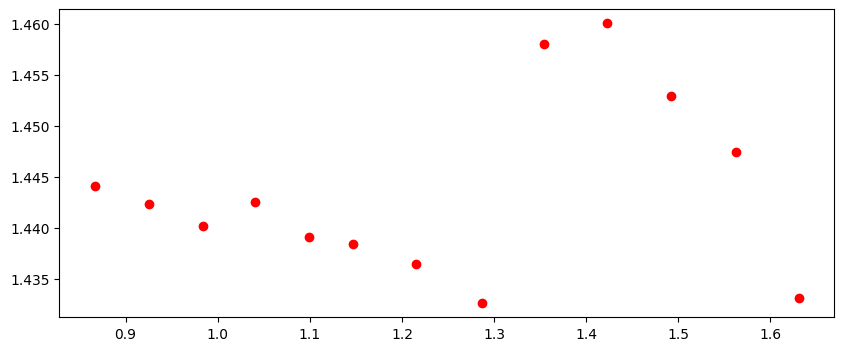

In [12]:
plt.figure(figsize=(10,4))
plt.scatter(wave,flux,c='r')